In [1]:
# Import necessary libraries
import pandas as pd             # For data manipulation and analysis
import numpy as np              # For numerical operations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns           # For advanced data visualization
from scipy import stats         # For statistical analysis
from sklearn.model_selection import train_test_split # For data splitting
from sklearn.linear_model import LinearRegression   # For linear regression modeling
from sklearn.metrics import mean_squared_error, r2_score # For model evaluation
from sklearn.preprocessing import StandardScaler    # For feature scaling

# Load the dataset
# Make sure 'insurance.csv' is in the same directory or specify the full path
insurance_data = pd.read_csv('insurance.csv')

# Display the first few rows of the data
insurance_data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. How is age related to medical costs?

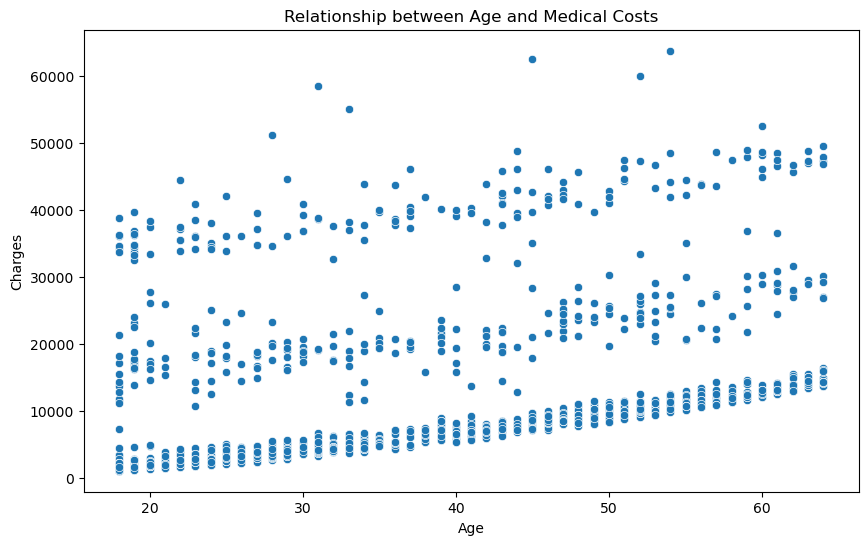

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges',data=insurance_data)
plt.title('Relationship between Age and Medical Costs')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


this scatterplot shows us how age related to medical cost,you can see the numbers

2.  How is number of children related to medical costs?

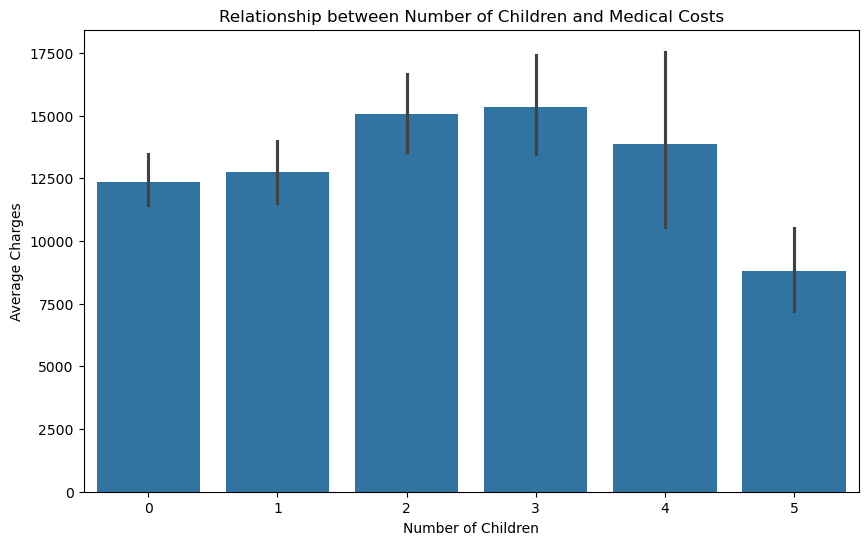

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x='children', y='charges', data=insurance_data)
plt.title('Relationship between Number of Children and Medical Costs')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()


this bar plot shows us how many children are related to  medication cost.

3. How is the number of people distributed by region?

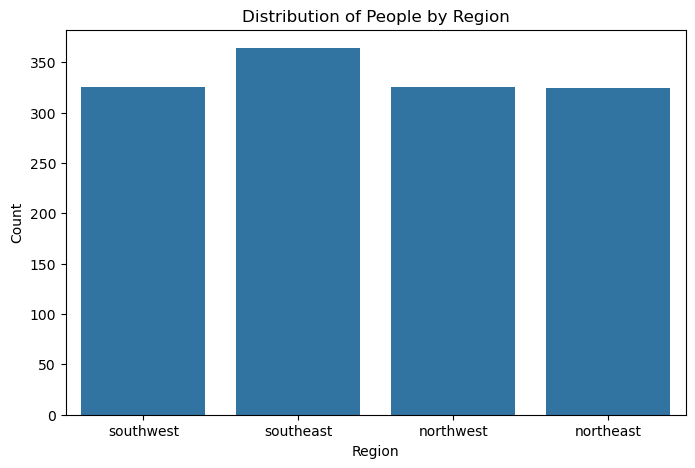

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='region', data=insurance_data)
plt.title('Distribution of People by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


this shows us of distribution of people by region like which region contribute most people

4.  How is the number of people distributed by age?

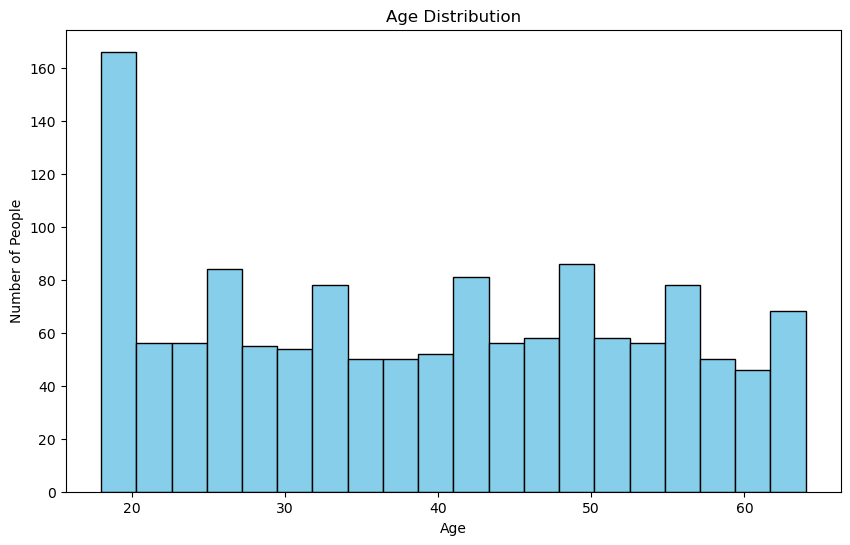

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(insurance_data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()


this  histogram shows us of distribution of people by age like which age have many people.

5. How are the charges distributed?

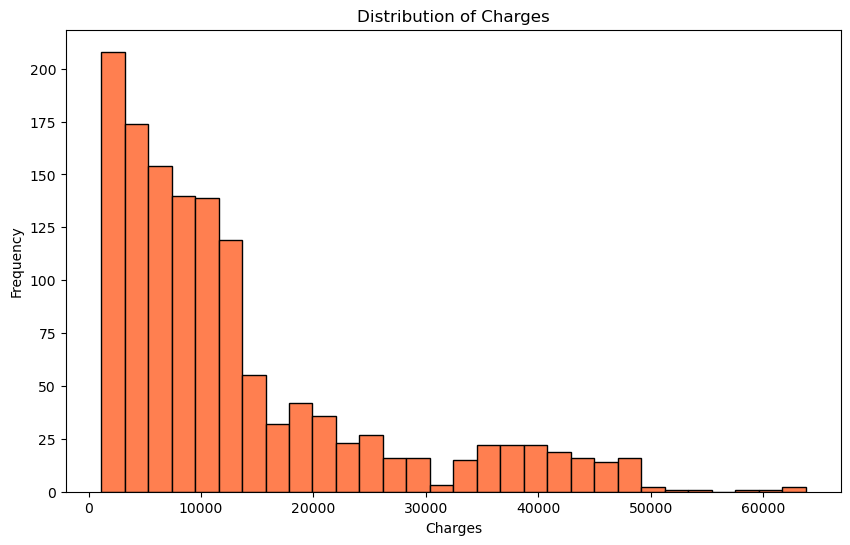

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(insurance_data['charges'], bins=30, color='coral', edgecolor='black')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


6.in the bmi column. To do that, search the internet to determine how you should bin and label the 
data.

In [14]:
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
insurance_data['bmi_category'] = pd.cut(insurance_data['bmi'], bins=bins, labels=labels)
insurance_data.head(10)


,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
5,31,female,25.740,0,no,southeast,3756.62160,Overweight
6,46,female,33.440,1,no,southeast,8240.58960,Obese
7,37,female,27.740,3,no,northwest,7281.50560,Overweight
8,37,male,29.830,2,no,northeast,6406.41070,Overweight
9,60,female,25.840,0,no,northwest,28923.13692,Overweight


7. How are the charges related to the bmi?

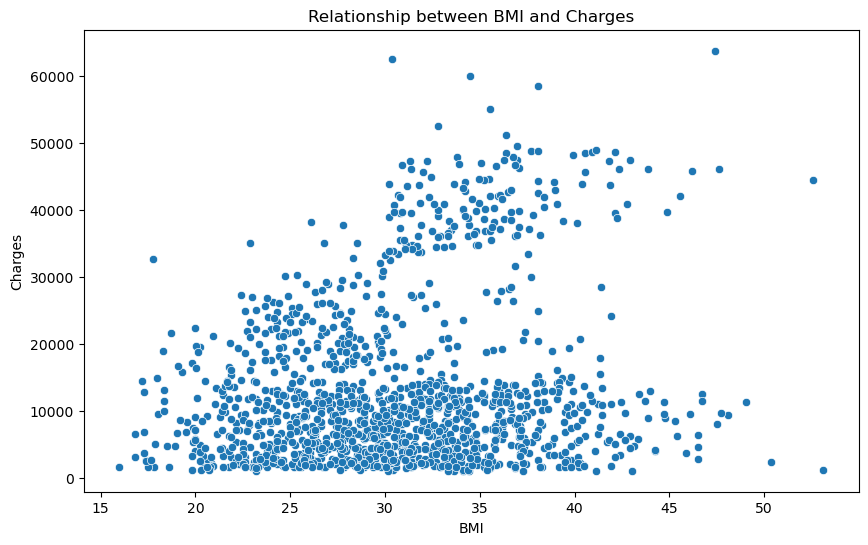

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=insurance_data)
plt.title('Relationship between BMI and Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


8.  How is the smoker status related to the charges?

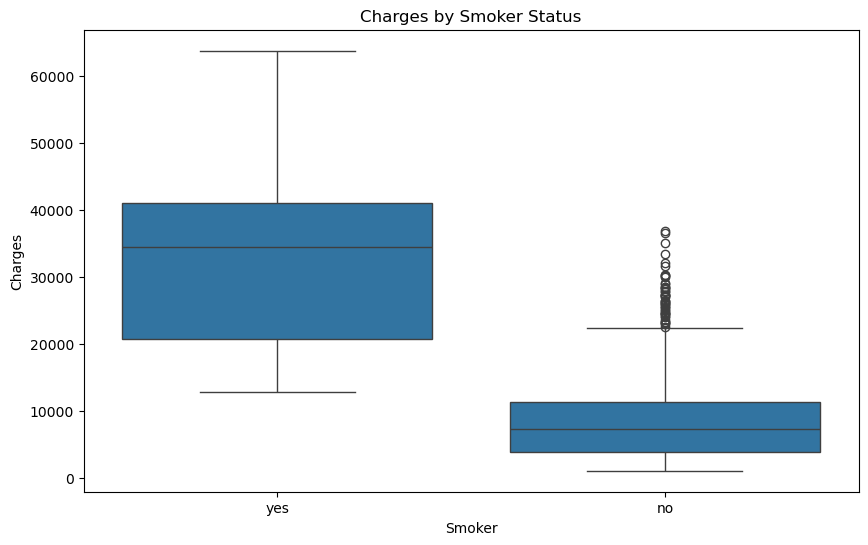

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=insurance_data)
plt.title('Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


9.  How are the charges related to the region?

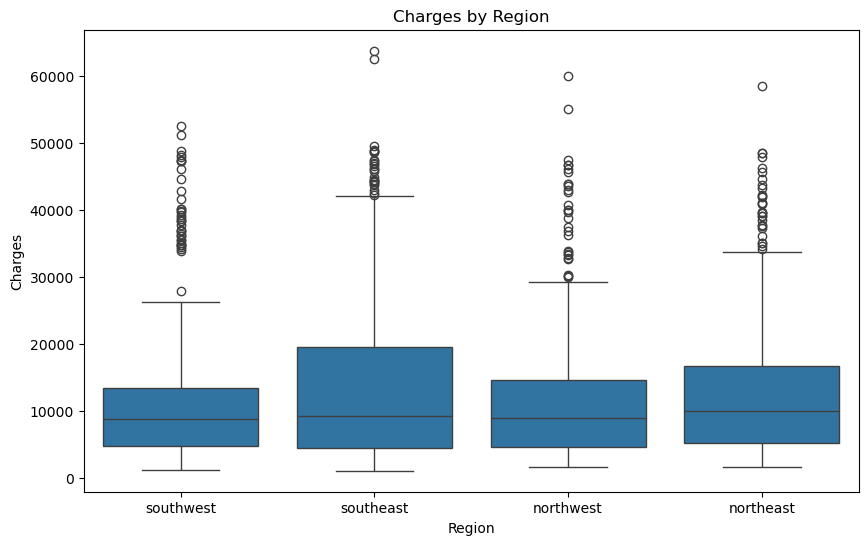

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=insurance_data)
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


10. which region has the highest obesity percentage?

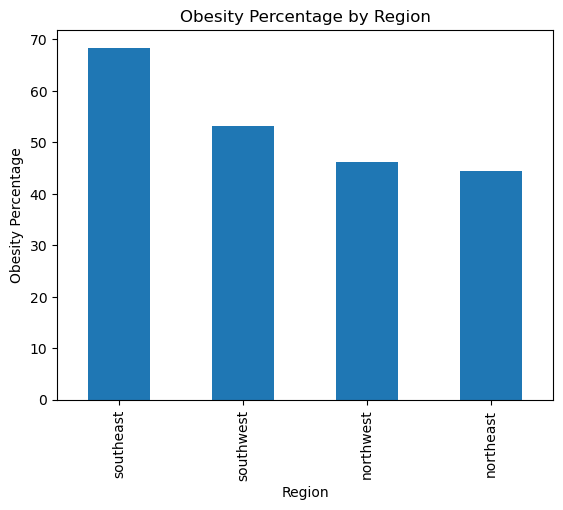

In [19]:
obesity_counts = insurance_data[insurance_data['bmi_category'] == 'Obese']['region'].value_counts()
region_counts = insurance_data['region'].value_counts()
obesity_percentage = (obesity_counts / region_counts * 100).sort_values(ascending=False)
obesity_percentage.plot(kind='bar')
plt.title('Obesity Percentage by Region')
plt.xlabel('Region')
plt.ylabel('Obesity Percentage')
plt.show()


this one shows us which region has the most obesity percentage.

11. Create a simple regression to show the relationship between charges and age

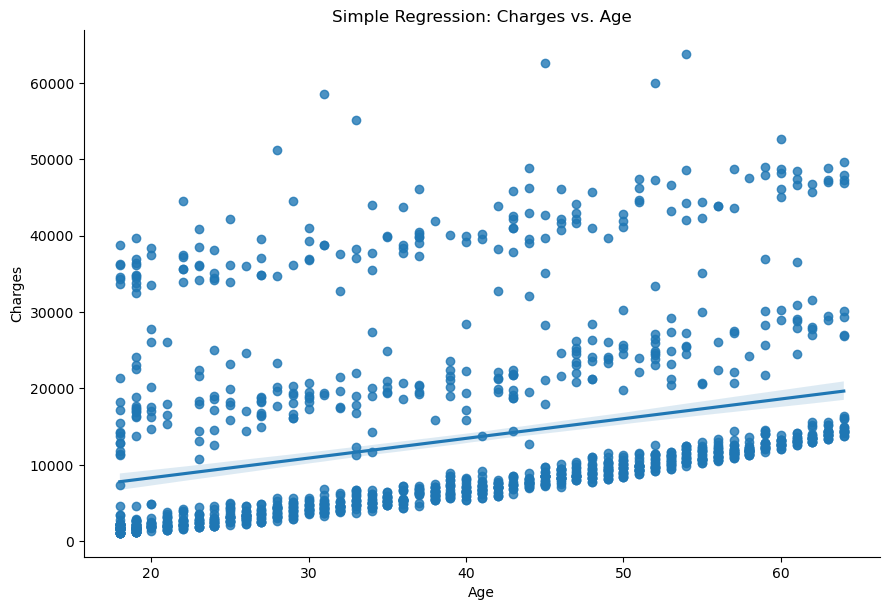

In [20]:
sns.lmplot(x='age', y='charges', data=insurance_data, height=6, aspect=1.5)
plt.title('Simple Regression: Charges vs. Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


12. How does this relationship change with smoking status?

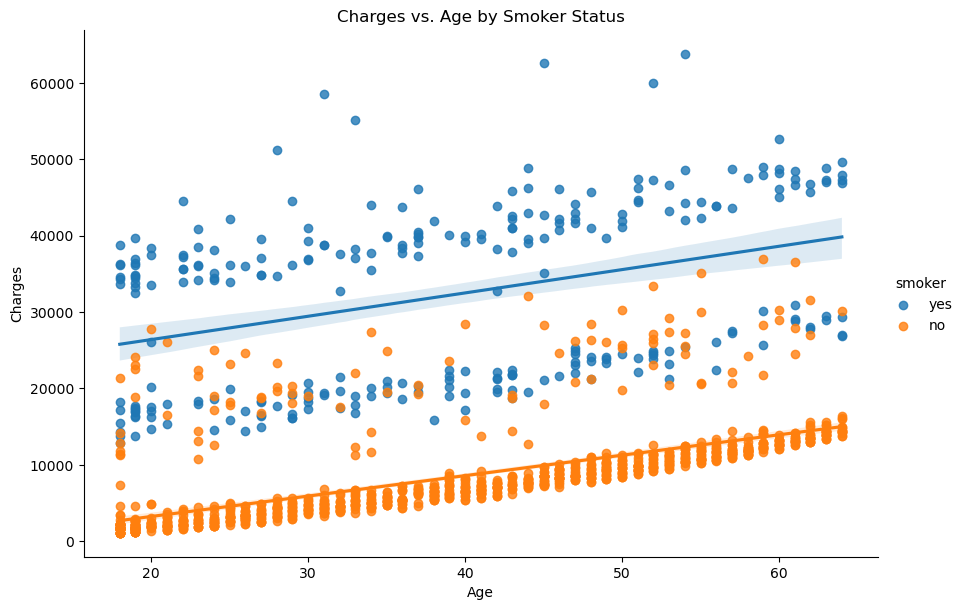

In [21]:
sns.lmplot(x='age', y='charges', hue='smoker', data=insurance_data, height=6, aspect=1.5)
plt.title('Charges vs. Age by Smoker Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


13. How does this relationship change with BMI?

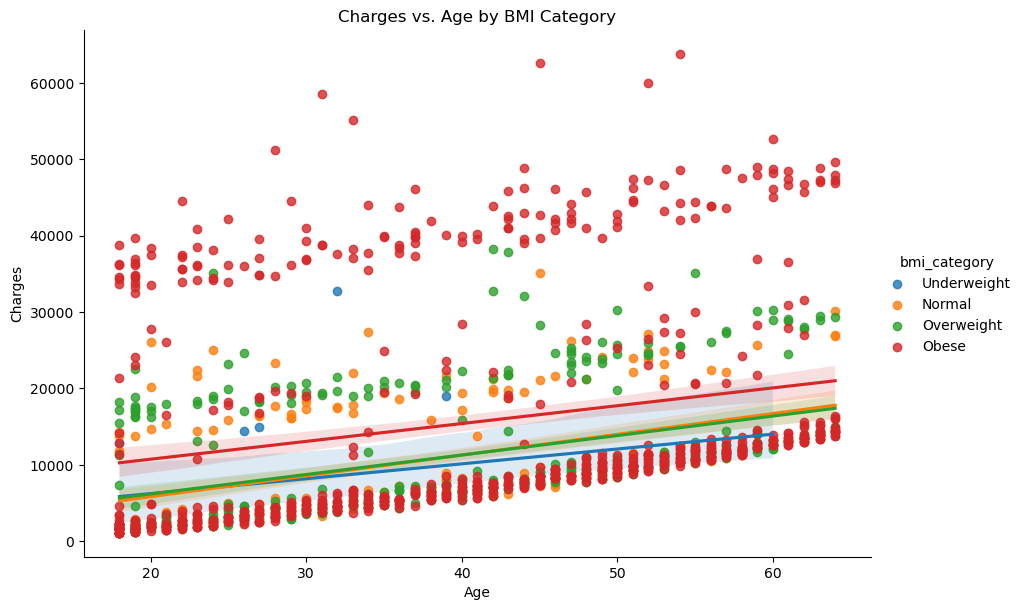

In [22]:
sns.lmplot(x='age', y='charges', hue='bmi_category', data=insurance_data, height=6, aspect=1.5)
plt.title('Charges vs. Age by BMI Category')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


14. Create a multiple regression model to predict charges. To do that, you’ll need to dummy encode and rescale the data.

In [31]:
insurance_encoded = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'], drop_first=True)
scaler = StandardScaler()
insurance_scaled = scaler.fit_transform(insurance_encoded[['age', 'bmi', 'children']])
X = np.concatenate([insurance_scaled, insurance_encoded.drop(columns=['charges', 'age', 'bmi', 'children'])], axis=1)
y = insurance_data['charges']


15. Make predictions with your multiple regression model and evaluate how well your model is working.

In [26]:
# Select the features (X) and target (y)
# Assuming 'charges' is the target column, and all other columns are predictors
X = insurance_data.drop(columns='charges')
y = insurance_data['charges']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate the R-squared value
r2 = r2_score(y_test, predictions)

print("R-squared (R²) value:", r2)


R-squared (R²) value: 0.7796299510481012


16. What is the optimal number of parameters for the multiple regression?

In [28]:
from sklearn.feature_selection import RFE
import numpy as np

# Fit RFE to select the top features
selector = RFE(model, n_features_to_select=5)
selector = selector.fit(X_train, y_train)

# Confirm that selector.support_ aligns with the shape of X_train
if len(selector.support_) == X_train.shape[1]:
    # Retrieve the names of the selected features
    selected_features = np.array(X.columns)[selector.support_]
    print("Optimal features:", selected_features)
else:
    print("Mismatch in dimensions. Check the encoded dataset and the RFE selector.")


Optimal features: ['children' 'smoker_yes' 'bmi_category_Normal' 'bmi_category_Overweight'
 'bmi_category_Obese']
